In [1]:
import urllib.request
import json
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
group_id = '-66036248'
access_token = '2c8987b52c8987b52c8987b53f2ceba9c222c892c8987b5764ba9cccfb123c3ce66f00d'
offsets = [100 * i for i in range(10)]
texts = open('texts.txt', 'w')
regYear = '.*\.'
average_lenComment_by_age = {}
average_lenComment_by_city = {}
mean_comment_len_by_post_len = {}
for offset in offsets:
    req = urllib.request.Request('https://api.vk.com/method/wall.get?owner_id=' + group_id + '&count=100&offset=' + str(offset) + '&v=5.74&access_token=' + access_token)
    response = urllib.request.urlopen(req)
    result = response.read().decode('utf-8')
    data = json.loads(result)
    for i in range(1, 100):
        text = data['response']['items'][i]['text']
        texts.write(text + '\n')
        post_len = len(text.split(' '))
        post_id = data['response']['items'][i]['id']
        comments_count = data['response']['items'][i]['comments']['count']
        offset = 0
        mean_comment_len = []
        while offset < comments_count:
            reqComments = urllib.request.Request('https://api.vk.com/method/wall.getComments?owner_id=' + group_id + '&post_id=' + str(post_id) + '&count=100&offset=' + str(offset) + '&extended=1&v=5.74&access_token=' + access_token)
            responseComments = urllib.request.urlopen(reqComments)
            resultComments = responseComments.read().decode('utf-8')
            dataComments = json.loads(resultComments)
            for i in range(1, 100):
                try:
                    comment = dataComments['response']['items'][i]['text']
                    texts.write(comment + '\n')
                    mean_comment_len.append(len(comment.split(' ')))
                    user_id = dataComments['response']['profiles'][i]['id']
                    reqUser = urllib.request.Request('https://api.vk.com/method/users.get?user_ids=' + str(user_id) + '&fields=city,bdate&v=5.74&access_token=' + access_token)
                    responseUser = urllib.request.urlopen(reqUser)
                    resultUser = responseUser.read().decode('utf-8')
                    user_data = json.loads(resultUser)
                    if user_data['response'][0]['bdate'] and len(user_data['response'][0]['bdate']) > 6:
                        bdate = user_data['response'][0]['bdate']
                        byear = re.sub(regYear, '', bdate)
                        age = 2018 - int(byear)
                        if age in average_lenComment_by_age:
                            (average_lenComment_by_age[age]).append(len(text.split(' ')))
                        else:
                            average_lenComment_by_age[age] = [len(text.split(' '))]
                    if user_data['response'][0]['city']:
                        city = user_data['response'][0]['city']['title']
                        if city in average_lenComment_by_city:
                            (average_lenComment_by_city[city]).append(len(text.split(' ')))
                        else:
                            average_lenComment_by_city[city] = [len(text.split(' '))]
                except:
                    break
            offset += 100
        if post_len not in mean_comment_len_by_post_len and mean_comment_len != []:
            mean_comment_len_by_post_len[post_len] = np.mean(mean_comment_len)
for age in average_lenComment_by_age:
    average_lenComment_by_age[age] = np.mean(average_lenComment_by_age[age])
for city in average_lenComment_by_city:
    average_lenComment_by_city[city] = np.mean(average_lenComment_by_city[city])
texts.close()

print(average_lenComment_by_age)
print(average_lenComment_by_city)
print(mean_comment_len_by_post_len)

{21: 141.8909090909091, 23: 149.5, 22: 135.36956521739131, 28: 31.5, 18: 136.5, 19: 97.852941176470594, 35: 34.333333333333336, 26: 91.142857142857139, 17: 163.0, 20: 142.75555555555556, 40: 339.0, 27: 75.0, 15: 54.0, 24: 126.5625, 25: 236.66666666666666, 59: 237.0, 29: 31.0, 44: 397.0, 37: 246.0, 113: 78.0, 30: 6.0, 45: 449.0, 51: 25.0, 104: 5.0}
{'Москва': 125.76991150442478, 'Baltimore': 133.83333333333334, 'Нижний Новгород': 25.399999999999999, 'Санкт-Петербург': 167.57446808510639, 'New York City': 61.75, 'Владимир': 34.333333333333336, 'Zürich': 147.0, 'Кишинев': 267.0, 'Краснодар': 267.0, 'Марьино': 29.0, 'Котлас': 339.0, 'Мытищи': 130.80000000000001, 'Zug': 54.0, 'Киев': 54.0, 'Автополигон': 19.0, 'Лысьва': 31.0, 'Тирасполь': 27.0, 'Ростов-на-Дону': 27.0, 'Киров': 252.0, 'Los Angeles': 367.0, 'Губкин': 531.0, 'San Francisco': 232.0, 'Уфа': 64.200000000000003, 'Пермь': 130.25, 'Paris': 44.0, 'Майкоп': 297.0, 'Липецк': 31.0, 'Волжский': 32.0, 'Железнодорожный (Балашиха)': 41.0, '

Ссылка на выкачанные тексты: https://cloud.mail.ru/public/AEUb/eMHEqNhCK

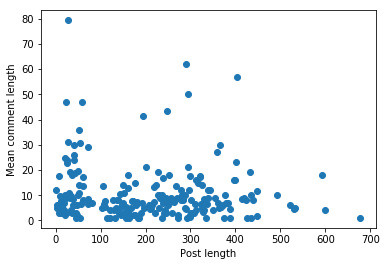

In [3]:
X = []
Y = []
for post_len in mean_comment_len_by_post_len:
    X.append(post_len)
    Y.append(mean_comment_len_by_post_len[post_len])
plt.xlabel('Post length')
plt.ylabel('Mean comment length')
plt.scatter(X, Y)
plt.show()

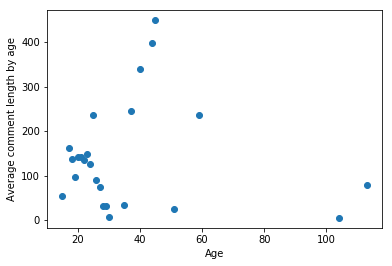

In [4]:
X = []
Y = []
for age in average_lenComment_by_age:
    X.append(age)
    Y.append(average_lenComment_by_age[age])
plt.xlabel('Age')
plt.ylabel('Average comment length by age')
plt.scatter(X, Y)
plt.show()

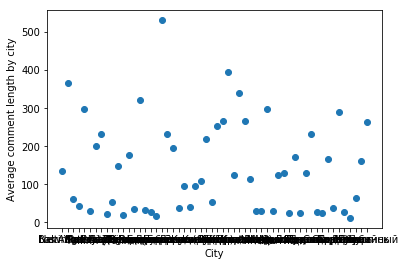

In [6]:
X = []
Y = []
for city in average_lenComment_by_city:
    X.append(city)
    Y.append(average_lenComment_by_city[city])
plt.xlabel('Сity')
plt.ylabel('Average comment length by city')
plt.scatter(X, Y)
plt.show()